# 9.7. Retropropagação ao longo do tempo

Esperançosamente, esta discussão trará alguma precisão à noção de gradientes que desaparecem e explodem 

A aplicação de retropropagação em RNNs é chamada de retropropagação ao longo do tempo ( Werbos, 1990 ) . Este procedimento requer que expandamos (ou desenrolemos) o gráfico computacional de uma RNN um passo de tempo por vez. 

Então, assim como em qualquer rede neural feedforward, podemos aplicar a regra da cadeia, retropropagando gradientes pela rede desenrolada.
O gradiente com relação a cada parâmetro deve ser somado em todos os lugares em que o parâmetro ocorre na rede desenrolada. 

Complicações surgem porque sequências podem ser bem longas. Não é incomum trabalhar com sequências de texto consistindo de mais de mil tokens. Note que isso apresenta problemas tanto do ponto de vista computacional (memória demais) quanto de otimização (instabilidade numérica). A entrada da primeira etapa passa por mais de 1000 produtos de matriz antes de chegar à saída, e outros 1000 produtos de matriz são necessários para calcular o gradiente. Agora analisamos o que pode dar errado e como lidar com isso na prática.

# 9.7.1. Análise de gradientes em RNNs

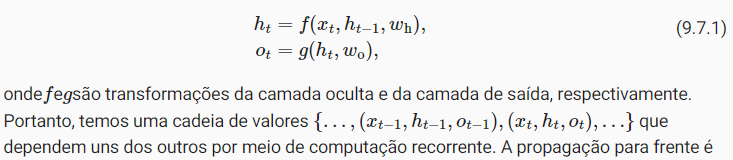


Perda na propagação direta: 

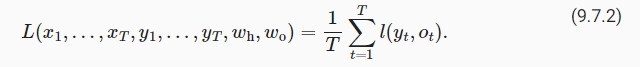

yt é o alvo desejado


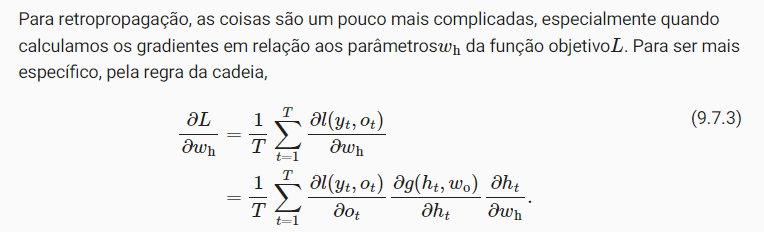

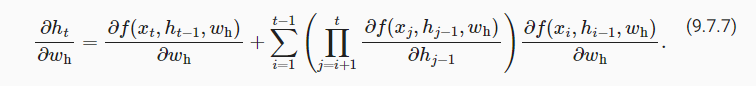



# 9.7.1.1. Computação completa

Uma ideia pode ser calcular a soma total em (9.7.7) . No entanto, isso é muito lento e os gradientes podem explodir, já que mudanças sutis nas condições iniciais podem potencialmente afetar muito o resultado

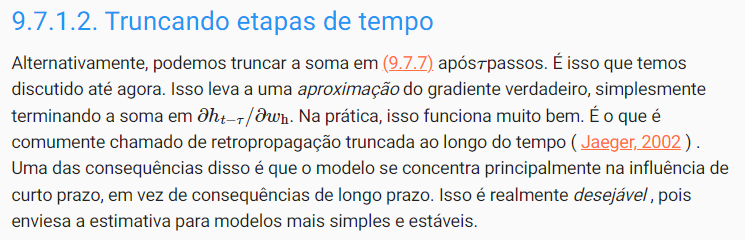

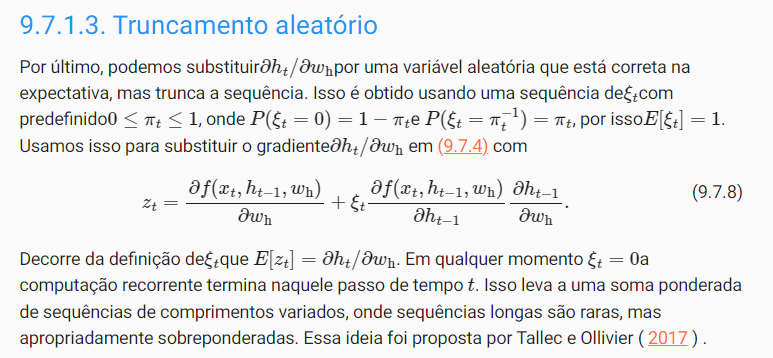


# 9.7.1.4. Comparando estratégias

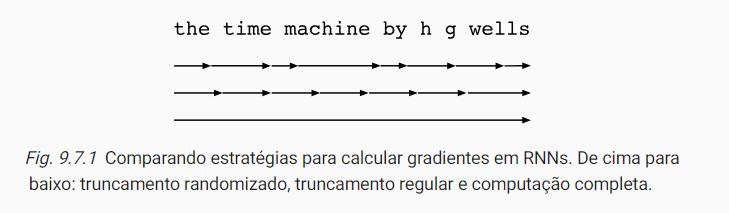

A Fig. 9.7.1 ilustra as três estratégias ao analisar os primeiros caracteres de The Time Machine usando retropropagação ao longo do tempo para RNNs:

- A primeira linha é o truncamento aleatório que divide o texto em segmentos de comprimentos variados.

- __A segunda linha é o truncamento regular que quebra o texto em subsequências do mesmo comprimento. É isso que temos feito em experimentos de RNN.__

- A terceira linha é a retropropagação completa ao longo do tempo que leva a uma expressão computacionalmente inviável.

Infelizmente, embora atraente em teoria, o truncamento aleatório não funciona muito melhor do que o truncamento regular, provavelmente devido a uma série de fatores. Primeiro, o efeito de uma observação após uma série de etapas de retropropagação no passado é suficiente para capturar dependências na prática. Segundo, a variância aumentada neutraliza o fato de que o gradiente é mais preciso com mais etapas. Terceiro, na verdade queremos modelos que tenham apenas um curto intervalo de interações. Portanto, a retropropagação regularmente truncada ao longo do tempo tem um leve efeito regularizador que pode ser desejável.

# 9.7.2. Retropropagação através do tempo em detalhes

Após discutir o princípio geral, vamos discutir a retropropagação através do tempo em detalhes. Em contraste com a análise na Seção 9.7.1 , a seguir mostraremos como calcular os gradientes da função objetivo com relação a todos os parâmetros do modelo decomposto.

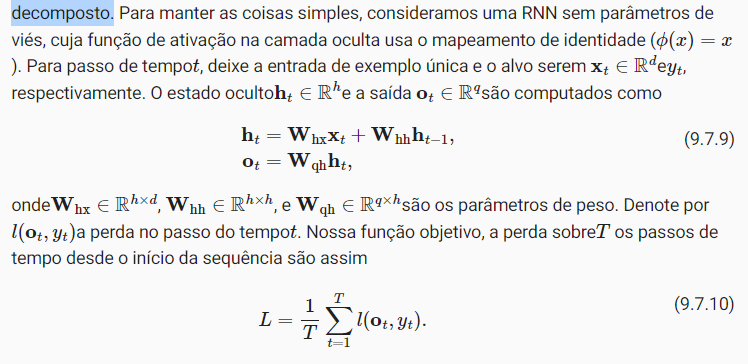

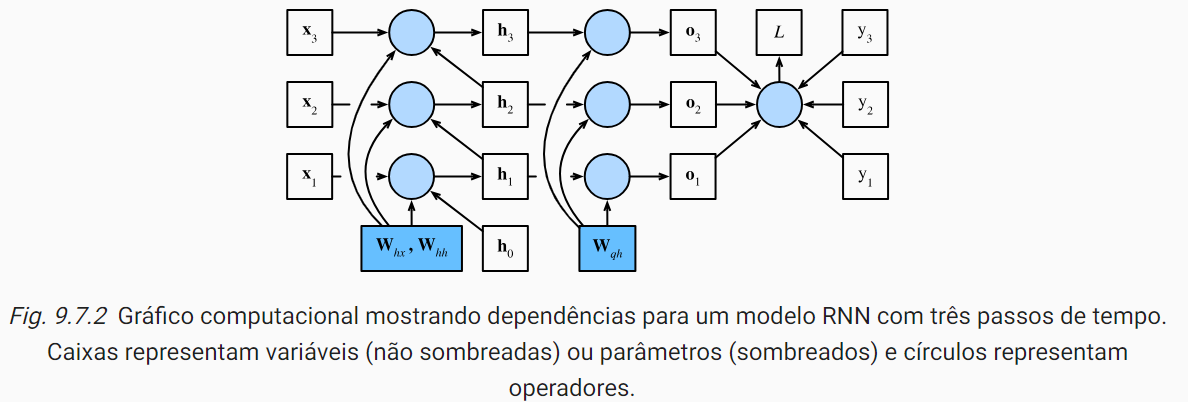

 Por exemplo, a computação dos estados ocultos do passo de tempo 3, h3, depende dos parâmetros do modelo Whx e Whh, o estado oculto do passo de tempo anterior h2, e a entrada do passo de tempo atual x3.

 o3 depende de h3 e Wqh.

 o3 é a saída real e y3 é a saída desejada. A diferença entre elas é dada pela função objetivo L (perda/loss).

 Whx, Whh e Wqh são parâmetros do modelo.  Geralmente, o treinamento deste modelo requer computação de gradiente com relação a estes parâmetros (derivada parcial de L com relação a cada um destes parâmetros).


# 9.7.3. Resumo

A retropropagação ao longo do tempo é meramente uma aplicação da retropropagação a modelos de sequência com um estado oculto. O truncamento, como regular ou randomizado, é necessário para conveniência computacional e estabilidade numérica. Altas potências de matrizes podem levar a autovalores divergentes ou evanescentes. Isso se manifesta na forma de gradientes explosivos ou evanescentes. Para computação eficiente, valores intermediários são armazenados em cache durante a retropropagação ao longo do tempo.

# Alternative Architectures:

Consider using more stable RNN architectures, such as __Long Short-Term Memory (LSTM)__ or __Gated Recurrent Unit (GRU)__, which are designed to mitigate the vanishing and exploding gradient problems to some extent.

# Respostas dos exercícios:

https://pandalab.me/archives/backpropagation_through_time